## Observations and Insights 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
pd.set_option("display.precision", 2)
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.DataFrame.merge(mouse_metadata, study_results)

#simplify name
df = merged_data

# Display the data table for preview
df.head()

#check value counts
df['Mouse ID'].value_counts()

# looks like g89 has 3 duplicated values


In [ ]:
# count number of unique mice

df_uniq = df.sort_values('Mouse ID')
df_uniq = df_uniq.drop_duplicates(subset='Mouse ID', keep='first')

num_unique_mice = df_uniq['Mouse ID'].count()

print (f"There were {num_unique_mice} mice used in this experiment")

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# actually the vaue_counts number above showed which mic were duplicate. 
#I had done this anlysis before realizing that so left i in.

df_sorted = df.sort_values(by=['Mouse ID', 'Timepoint'])

#identify duplicated rows
dupes = df_sorted[df_sorted.duplicated(['Mouse ID', 'Timepoint'])]

#after looking at the above results, g989 had duplicated data. (as shown in values.count result)
duplicated_mouse_data = df[df['Mouse ID'] == 'g989']

#removed all rows for mouse g989.  Not sure if we should just remove the duplicated rows,
#but instructions seemd to say get rid of all data for that mouse
filtered_df = df[df['Mouse ID'] != 'g989']

#see how many unique mie are now in the expriment

new_df_uniq = filtered_df.drop_duplicates(subset='Mouse ID', keep='first')

new_unique_mice = new_df_uniq['Mouse ID'].count()

#check that the right number of rows, and only one unique mouse were removed

original_num = df['Mouse ID'].value_counts().sum()   
num_dups = dupes['Mouse ID'].value_counts().sum()
num_dup_rows = duplicated_mouse_data['Mouse ID'].value_counts().sum()
filtered_num = filtered_df['Mouse ID'].value_counts().sum()

print (f"There were originally {num_unique_mice} mice used in this experiment")
print (f"After dups removed there are {new_unique_mice} mice represented in the data")

print(f"original total of observations = {original_num}")
print(f"number duplicated rows identified = {num_dups}")
print(f"number of rows from the problem mouse (g989) = {num_dup_rows}")
print(f"number of observations remaining after g989 removed = {filtered_num}")


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

clean = filtered_df
drugs = clean['Drug Regimen'].value_counts()

clean_uniq = clean.sort_values('Drug Regimen')
drugs = clean_uniq.drop_duplicates(subset='Drug Regimen', keep='first')

#make a list of drugs
reg = [drug for drug in drugs['Drug Regimen']]

#group data frame by drug regimen 
gby_regimen = clean.groupby('Drug Regimen')

#make a list of each decriptive statistic
means = [stat for stat in gby_regimen['Tumor Volume (mm3)'].mean()]
medians = [stat for stat in gby_regimen['Tumor Volume (mm3)'].median()]
stds = [stat for stat in gby_regimen['Tumor Volume (mm3)'].std()]
vars = [stat for stat in gby_regimen['Tumor Volume (mm3)'].var()]
sems = [stat for stat in gby_regimen['Tumor Volume (mm3)'].sem()]

# Make a dictionary with appropriate column names and corresponding list of values
stats_dict = {'Drug': reg, 
              'Mean':means,
              'Median': medians, 
              'St. Dev':stds, 
              'Variance': vars,
              'SEM': sems}

stats_dict_df = pd.DataFrame(stats_dict)
stats_dict_df.style.set_caption("Descriptive Statistics for Tumor Volume Following Various Drug Treatments")

    

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen




In [ ]:
# Using the aggregation method, produce the same summary statistics in a single line
gby_regimen.agg({'Tumor Volume (mm3)': ['mean','median', 'std', 'var', 'sem']})

# I found this method on my own after many googles, then read the instructions.  I'm seeing a pattern.



## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

clean.rename(columns = {"Tumor Volume (mm3)" : "Volume"}, inplace =True)

gby_drug = clean.groupby(['Drug Regimen'])

ax = gby_drug['Volume'].count().plot(kind='bar')

ax.set(xlabel='Drug', ylabel='Number of measurements', title = 'The number of tumor measurements for each drug treatment' )


In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
data = gby_drug['Volume'].count()

data = data.reset_index()
data

plt.bar(data['Drug Regimen'], data['Volume'])
plt.xticks(rotation='vertical')
plt.title('The number of tumor measurements for each drug treatment')
#plt.bar(names, values)



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex = clean.groupby(['Sex'])
sex_count = sex['Sex'].count()
sex_count.plot(kind='pie', shadow = True, figsize=(5,5), autopct='%1.1f%%')



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean.groupby(['Sex'])
sex_count = sex['Mouse ID'].count().reset_index()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = sex_count['Sex']
sizes = sex_count['Mouse ID']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("sex")



#sex_count




## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
new_df = clean[clean['Timepoint'] == max(clean['Timepoint'])]
new_df['Mouse ID'].value_counts().sum()

#new_df.head(n=50)  - looks good.  ALl time points are 45.



looks like there are 2 outliers across all four treatments


{'whiskers': [<matplotlib.lines.Line2D at 0x1e7307b2fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e7307bf710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e7307b2cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e7307bfe10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e7307ca1d0>],
 'means': []}

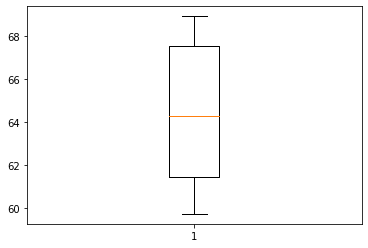

In [97]:
# Put treatments into a list for for loop (and later for plot labels)

#treatment_list

treatments = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

cap = new_df[new_df['Drug Regimen'] == 'Capomulin']
ram = new_df[new_df['Drug Regimen'] == 'Ramicane']
inf = new_df[new_df['Drug Regimen'] == 'Infubinol']
cef = new_df[new_df['Drug Regimen'] == 'Ceftamin']

volumes = {'Capomulin':cap['Volume'],
           'Ramicane':ram['Volume'],
           'Infubinol': inf['Volume'], 
           'Ceftamin' : cef['Volume'] }

volumes['Ceftamin'].count()

new_df['Drug Regimen'].value_counts()

vol_df = pd.DataFrame.from_dict(volumes)

outliers = 0
for treatment in treatments:
    
    first = np.percentile(volumes[treatment], 25)
    third = np.percentile(volumes[treatment], 75)
    IQR = round(third-first,2)
    upper = third + IQR
    lower = first - IQR
    #print(upper)
    #print(lower)
    
    for value in volumes[treatment]:
        if value < lower or value > upper:
            outliers +=1
            
print(f"looks like there are {outliers} outliers across all four treatments")


            
plt.boxplot(volumes['Ceftamin'])
            

    
    
    

    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
